In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


ModuleNotFoundError: No module named 'sklearn'

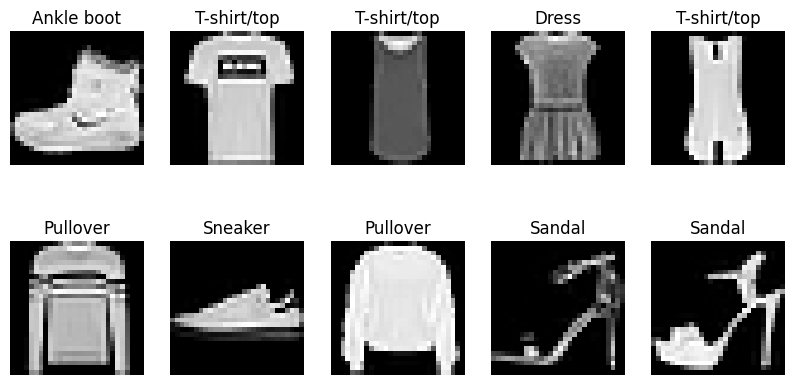

In [ ]:
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat",
               "Sandal","Shirt","Sneaker","Bag","Ankle boot"]
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(class_names[y_train[i]])
    plt.axis("off")
plt.show()


In [ ]:
#  Normalization
X_train = X_train / 255.0
X_test = X_test / 255.0
print("Data range after normalization:", X_train.min(), "to", X_train.max())


Data range after normalization: 0.0 to 1.0


In [ ]:
#  One-hot Encoding
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


In [ ]:
#  Build Neural Network
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(256, activation="relu"),
    Dropout(0.3),
    Dense(128, activation="relu"),
    Dropout(0.3),
    Dense(10, activation="softmax")
])
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train_cat,
                    validation_data=(X_test, y_test_cat),
                    epochs=10, batch_size=128, verbose=1)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7027 - loss: 0.8400 - val_accuracy: 0.8373 - val_loss: 0.4410
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8382 - loss: 0.4480 - val_accuracy: 0.8593 - val_loss: 0.3881
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8551 - loss: 0.3972 - val_accuracy: 0.8650 - val_loss: 0.3755
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8657 - loss: 0.3717 - val_accuracy: 0.8682 - val_loss: 0.3620
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8701 - loss: 0.3544 - val_accuracy: 0.8721 - val_loss: 0.3506
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8758 - loss: 0.3376 - val_accuracy: 0.8753 - val_loss: 0.3430
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8769 - loss: 0.3357 - val_accuracy: 0.8782 - val_loss: 0.3423
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8798 - loss: 0.3237 - val_accuracy: 0.

Test Accuracy: 0.8833000063896179


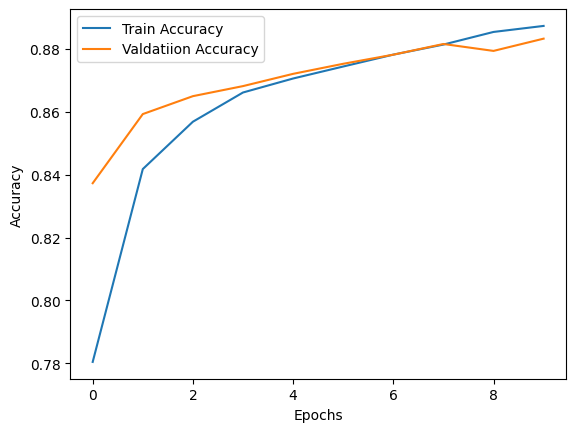

In [ ]:
#  Model Evaluation

loss, acc = model.evaluate(X_test, y_test_cat, verbose=0)
print("Test Accuracy:", acc)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Valdatiion Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_classes, target_names=class_names))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.81      0.87      0.84      1000
     Trouser       0.99      0.96      0.98      1000
    Pullover       0.78      0.80      0.79      1000
       Dress       0.90      0.88      0.89      1000
        Coat       0.76      0.84      0.80      1000
      Sandal       0.97      0.97      0.97      1000
       Shirt       0.75      0.63      0.68      1000
     Sneaker       0.95      0.94      0.94      1000
         Bag       0.96      0.98      0.97      1000
  Ankle boot       0.94      0.96      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

